# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print(json.dumps(requests.get('http://api.openweathermap.org/data/2.5/weather?q=yellowknife&APPID=' + api_keys.api_key).json(), indent=4))

{
    "coord": {
        "lon": -114.38,
        "lat": 62.45
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 256.52,
        "pressure": 1021,
        "humidity": 50,
        "temp_min": 255.37,
        "temp_max": 258.15
    },
    "visibility": 24140,
    "wind": {
        "speed": 4.6,
        "deg": 330
    },
    "clouds": {
        "all": 20
    },
    "dt": 1554347526,
    "sys": {
        "type": 1,
        "id": 1007,
        "message": 0.0039,
        "country": "CA",
        "sunrise": 1554295927,
        "sunset": 1554344949
    },
    "id": 6185377,
    "name": "Yellowknife",
    "cod": 200
}


In [4]:
x = -1
lat = []
lon = []
temp = []
hum = []
wnd = []
cloud = []
city1 = []
for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?q=' + city + '&APPID=' + api_keys.api_key
    x = x + 1
    try:
        response = requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wnd.append(response["wind"]["speed"])
        city1.append(city)
        print(f"La ciudad en la que va es {x} y su nombre es {city}")
    except:
        print("Error, pasando a la próxima ciudad")

La ciudad en la que va es 0 y su nombre es chapadinha
La ciudad en la que va es 1 y su nombre es punta arenas
La ciudad en la que va es 2 y su nombre es rikitea
Error, pasando a la próxima ciudad
La ciudad en la que va es 4 y su nombre es upernavik
La ciudad en la que va es 5 y su nombre es atuona
La ciudad en la que va es 6 y su nombre es ahipara
La ciudad en la que va es 7 y su nombre es morro bay
La ciudad en la que va es 8 y su nombre es vaini
La ciudad en la que va es 9 y su nombre es new norfolk
La ciudad en la que va es 10 y su nombre es maralal
La ciudad en la que va es 11 y su nombre es pringsewu
Error, pasando a la próxima ciudad
La ciudad en la que va es 13 y su nombre es kununurra
La ciudad en la que va es 14 y su nombre es cherskiy
La ciudad en la que va es 15 y su nombre es cape town
La ciudad en la que va es 16 y su nombre es ponta do sol
Error, pasando a la próxima ciudad
La ciudad en la que va es 18 y su nombre es kapaa
Error, pasando a la próxima ciudad
La ciudad en l

La ciudad en la que va es 159 y su nombre es gushikawa
La ciudad en la que va es 160 y su nombre es tuktoyaktuk
La ciudad en la que va es 161 y su nombre es alvaro obregon
La ciudad en la que va es 162 y su nombre es baracoa
Error, pasando a la próxima ciudad
La ciudad en la que va es 164 y su nombre es iracoubo
La ciudad en la que va es 165 y su nombre es seoul
Error, pasando a la próxima ciudad
La ciudad en la que va es 167 y su nombre es shalakusha
La ciudad en la que va es 168 y su nombre es tarko-sale
Error, pasando a la próxima ciudad
La ciudad en la que va es 170 y su nombre es mar del plata
La ciudad en la que va es 171 y su nombre es sunrise manor
La ciudad en la que va es 172 y su nombre es coleraine
La ciudad en la que va es 173 y su nombre es suntar
La ciudad en la que va es 174 y su nombre es praia da vitoria
La ciudad en la que va es 175 y su nombre es ilulissat
La ciudad en la que va es 176 y su nombre es isangel
La ciudad en la que va es 177 y su nombre es eslamshahr
La

La ciudad en la que va es 318 y su nombre es atar
La ciudad en la que va es 319 y su nombre es mato verde
La ciudad en la que va es 320 y su nombre es haines junction
Error, pasando a la próxima ciudad
La ciudad en la que va es 322 y su nombre es taoudenni
Error, pasando a la próxima ciudad
La ciudad en la que va es 324 y su nombre es kingaroy
La ciudad en la que va es 325 y su nombre es gotsu
La ciudad en la que va es 326 y su nombre es beidao
Error, pasando a la próxima ciudad
La ciudad en la que va es 328 y su nombre es sao paulo de olivenca
La ciudad en la que va es 329 y su nombre es pichayevo
La ciudad en la que va es 330 y su nombre es dawei
La ciudad en la que va es 331 y su nombre es port hawkesbury
La ciudad en la que va es 332 y su nombre es greenville
La ciudad en la que va es 333 y su nombre es mogzon
La ciudad en la que va es 334 y su nombre es katherine
La ciudad en la que va es 335 y su nombre es acari
La ciudad en la que va es 336 y su nombre es tshane
La ciudad en la 

La ciudad en la que va es 474 y su nombre es banjar
La ciudad en la que va es 475 y su nombre es dickinson
La ciudad en la que va es 476 y su nombre es homer
La ciudad en la que va es 477 y su nombre es laguna
La ciudad en la que va es 478 y su nombre es aksarka
La ciudad en la que va es 479 y su nombre es nieuw amsterdam
La ciudad en la que va es 480 y su nombre es gaur
La ciudad en la que va es 481 y su nombre es dumas
La ciudad en la que va es 482 y su nombre es agirish
La ciudad en la que va es 483 y su nombre es wiarton
La ciudad en la que va es 484 y su nombre es tabas
La ciudad en la que va es 485 y su nombre es kumluca
La ciudad en la que va es 486 y su nombre es verkh-usugli
La ciudad en la que va es 487 y su nombre es alofi
La ciudad en la que va es 488 y su nombre es gamba
La ciudad en la que va es 489 y su nombre es inta
La ciudad en la que va es 490 y su nombre es marsa matruh
La ciudad en la que va es 491 y su nombre es kampong thum
La ciudad en la que va es 492 y su nomb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
dicc = {"City":city1, "Latitude":lat, "Longitud":lon, "Temperature":temp, "Humidity":hum, "Wind":wnd, "Cloudiness":cloud}

In [6]:
print(len(lat))
print(len(lon))
print(len(temp))
print(len(hum))
print(len(wnd))
print(len(cloud))
print(len(city1))

540
540
540
540
540
540
540


In [7]:
tabla = pd.DataFrame(dicc)

tabla.head()

,City,Latitude,Longitud,Temperature,Humidity,Wind,Cloudiness
0,chapadinha,-3.74,-43.35,295.921,97,1.22,92
1,punta arenas,-53.16,-70.91,278.150,100,9.30,40
2,rikitea,-23.12,-134.97,297.521,100,8.37,12
3,upernavik,72.79,-56.15,262.221,91,18.37,80
4,atuona,-9.80,-139.03,300.971,100,6.02,0


In [8]:
tabla.to_csv('c:/Users/cvargas/Desktop/api_hw.csv', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

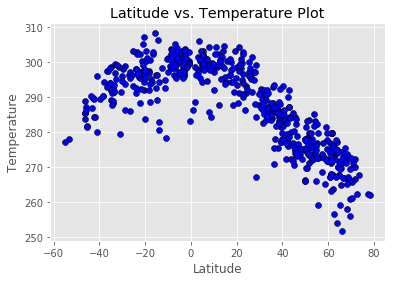

In [14]:
plt.scatter(tabla["Latitude"], tabla["Temperature"], edgecolors="Black", color='Blue')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
#plt.grid(color="white")
plt.style.use('ggplot')
plt.show()

#### Latitude vs. Humidity Plot

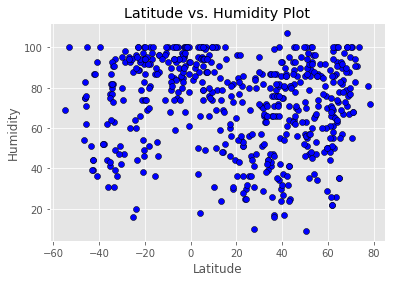

In [16]:
plt.scatter(tabla["Latitude"], tabla["Humidity"], edgecolors="Black", color="Blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
#plt.grid(color="white")
plt.style.use('ggplot')
plt.show()

#### Latitude vs. Cloudiness Plot

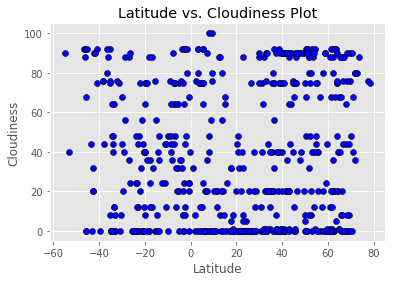

In [17]:
plt.scatter(tabla["Latitude"], tabla["Cloudiness"], edgecolors="Black", color="Blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
#plt.grid(color="white")
plt.style.use('ggplot')
plt.show()

#### Latitude vs. Wind Speed Plot

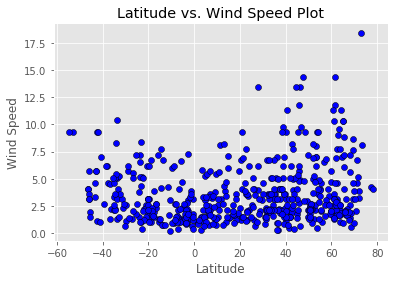

In [19]:
plt.scatter(tabla["Latitude"], tabla["Wind"], edgecolors="Black", color="Blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot")
#plt.grid(color="white")
plt.style.use('ggplot')
plt.show()

In [ ]:
#The Latitd does not affect the results of Humidity, Wind and Cloudiness
#Where the lattitud is greater, the temperature is lower and the other way around
#I think that the visualizations i'm looking at are insufficente, what about temperature vs Wind or Cloudiness vs Temperature
#    those can give a better visualization of the trends.